Incompleto

<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Laboratorio_04_reg_multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
np.random.seed(0)

# **Laboratorio 4**
Objetivo: Programar una regresión multivariada

## **1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.**

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano. 

- Realizar un diagrama 3D de los puntos generados aleatoriamente. 


Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados. 

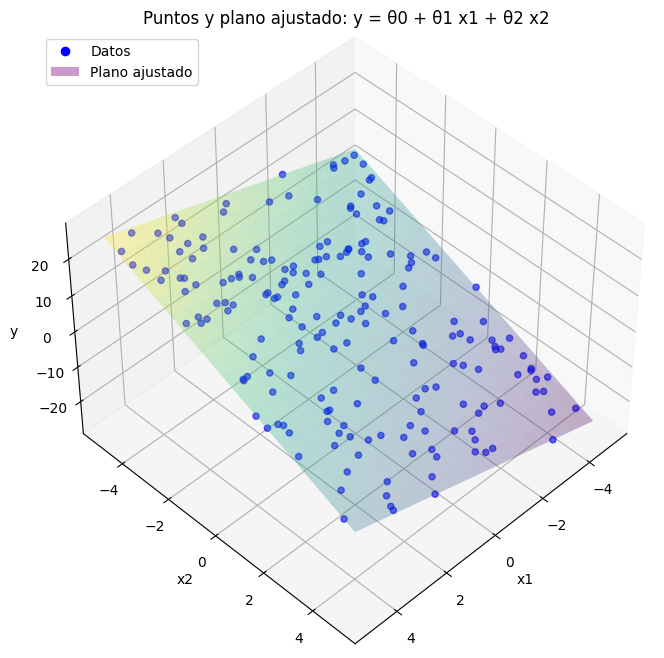

In [100]:
# Definimos las variables x1, x2 y obtenemos el plano y
n_samples = 200
x1 = np.random.uniform(-5, 5, n_samples)
x2 = np.random.uniform(-5, 5, n_samples)
y  = 2.1*x1 - 3.1*x2

X = np.column_stack([np.ones(n_samples), x1, x2]) # Construimos la matriz de características
theta_norm = np.linalg.inv(X.T @ X) @ (X.T @ y) # Por teorema demostrado en clase: Theta = (XX^T)^-1(XY)

# —————————————————————————————
# Gráfico 3D de puntos + plano
# —————————————————————————————
fig = plt.figure(figsize=(16, 8))
ax  = fig.add_subplot(111, projection='3d')

# 1) Scatter de los puntos
pts = ax.scatter(x1, x2, y,
                 c='b', marker='o', alpha=0.6)

# 2) Malla y plano ajustado
grid_x1 = np.linspace(x1.min(), x1.max(), 20)
grid_x2 = np.linspace(x2.min(), x2.max(), 20)
X1_m, X2_m = np.meshgrid(grid_x1, grid_x2)
Y_m = theta_norm[0] + theta_norm[1]*X1_m + theta_norm[2]*X2_m

ax.plot_surface(X1_m, X2_m, Y_m, cmap='viridis', alpha=0.3)

# 3) Construcción manual de la leyenda
legend_handles = [
    Line2D([0],[0], marker='o', color='w',
           markerfacecolor='b', markersize=8, label='Datos'),
    Patch(facecolor='purple', edgecolor='none', alpha=0.4,
          label='Plano ajustado')
]

ax.legend(handles=legend_handles, loc='upper left')

# Etiquetas
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Puntos y plano ajustado: y = θ0 + θ1 x1 + θ2 x2')
ax.view_init(elev=45, azim=45)

plt.show()

## **2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.**

## **3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.**

## **4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):**
 
  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

## **5. Aplicar el gradiente descendente:** 
  - Encontrar el gradiente.
    $\nabla J = \Lambda X.T$
  
  - Actualizar los nuevos parametros: 
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$

## **6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano.**